## Pitney Bowes Data Challenge_Team 2 (Noni)

### Import Data and Check

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/Users/NONI/Desktop/DataChallenge/SMOTE_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62198 entries, 0 to 62197
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         62198 non-null  int64  
 1   avg_time_charging_lag1             62198 non-null  float64
 2   avg_time_charging_lag2             62198 non-null  float64
 3   avg_time_charging_lag3             62198 non-null  float64
 4   charging_rate_lag3                 62198 non-null  float64
 5   avg_time_discharging_lag1          62198 non-null  float64
 6   avg_time_discharging_lag2          62198 non-null  float64
 7   avg_time_discharging_lag3          62198 non-null  float64
 8   discharging_rate_lag3              62198 non-null  float64
 9   charge_cycle_time_below_12         62198 non-null  bool   
 10  avg_time_charging_lag4             62198 non-null  float64
 11  avg_time_discharging_lag4          62198 non-null  flo

In [4]:
df.head()

,Unnamed: 0,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,charging_rate_lag3,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,discharging_rate_lag3,charge_cycle_time_below_12,...,discharging_rate_lag6_median,discharging_rate_lag8_median,avg_time_charging_lag12_random,avg_time_discharging_lag12_random,avg_time_charging_lag13_random,avg_time_discharging_lag13_random,avg_time_charging_lag14_random,avg_time_discharging_lag14_random,Days,fail_7
0,0,0.044546,0.409384,0.080534,0.890524,0.037009,0.828327,0.136601,0.365791,False,...,0.622073,0.747085,0.024805,0.041633,0.024729,0.028677,0.028984,0.042778,0.686567,0
1,1,0.432996,0.041909,0.076458,0.891102,0.597424,0.053068,0.047526,0.384668,False,...,0.543742,0.748188,0.093281,0.168223,0.176043,0.340139,0.030757,0.065392,0.582090,0
2,2,0.049358,0.040683,0.055336,0.884205,0.044314,0.045057,0.028665,0.340314,False,...,0.605585,0.753230,0.026202,0.038698,0.022890,0.032476,0.221858,0.385565,0.562189,0
3,3,0.038870,0.396504,0.441206,0.890409,0.032779,0.688786,0.558263,0.382947,False,...,0.599664,0.749081,0.021311,0.033805,0.101397,0.176052,0.028452,0.035711,0.711443,0
4,4,0.044299,0.431156,0.056695,0.889985,0.040085,0.643910,0.025490,0.386964,True,...,0.605451,0.721609,0.027949,0.045725,0.210149,0.452759,0.176033,0.347875,0.800995,0


In [5]:
# Covert to Datetime 
# Calculate days between LastRecord ~ DateDeployed

# df['LastRecord'] = pd.to_datetime(df['LastRecord'])
# df['Date Deployed'] = pd.to_datetime(df['Date Deployed'])

In [6]:
# Create a new column for the days

# df['days'] = df['LastRecord'] - df['Date Deployed']
# df['days'] = df['days'].dt.days.astype('int16')
# df['days']

In [7]:
# Check nums of rows and variables

nRow = df.shape[0]
nVar = df.shape[1]
print('nRow: %d' % nRow, 'nVar: %d' % nVar )

nRow: 62198 nVar: 53


In [8]:
# Remove non-related variables to SHAP value

df1 = df.drop(['Unnamed: 0'], axis = 1)
df1['charge_cycle_time_below_12']=df1['charge_cycle_time_below_12'].astype('category').cat.codes
df1['charge_cycle_time_below_12']

0        0
1        0
2        0
3        0
4        1
        ..
62193    0
62194    1
62195    0
62196    1
62197    1
Name: charge_cycle_time_below_12, Length: 62198, dtype: int8

In [9]:
# split our training and test sets

feature_col = list(df1.columns.difference(['fail_7']))
x=df1[feature_col]
y=df1['fail_7']

In [10]:
# split our train and test sets (8:2)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) 

(49758, 51) (12440, 51) (49758,) (12440,)


### LightGBM (Ensemble Learning, Gradient Boosting)
#### other option; 
Gradient Boosting: XGBoost, CatBoost / Bagging: Random Forest

In [11]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [12]:
# from math import sqrt
# from sklearn.metrics import mean_squared_error

# # train data -> LightGBM model
# lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) 
# lgb_param = {'max_depth': 10, # Tree depth
#             'learning_rate': 0.01, # Step Size
#             'n_estimators': 1000, # Number of trees
#             'objective': 'regression'} #Regression?

# # Train Model
# lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
# # Model Prediction
# lgb_model_predict = lgb_model.predict(test_x)

# # Root Mean Square Error
# print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) 
##########################################################################################


# Accuracy is good measure when the target variable class in the data are nearly balanced.
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# train data -> LightGBM modeling
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) 
lgb_param = {"objective": "binary", "metric": "binary_logloss"} #Binary
lgb_model = lgb.train(lgb_param, lgb_dtrain)

y_pred = lgb_model.predict(test_x)

print("Test Accuracy Classification score: {}".format(accuracy_score(test_y, y_pred>0.5)))

[LightGBM] [Info] Number of positive: 24824, number of negative: 24934
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12752
[LightGBM] [Info] Number of data points in the train set: 49758, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498895 -> initscore=-0.004421
[LightGBM] [Info] Start training from score -0.004421
Test Accuracy Classification score: 0.8288585209003215


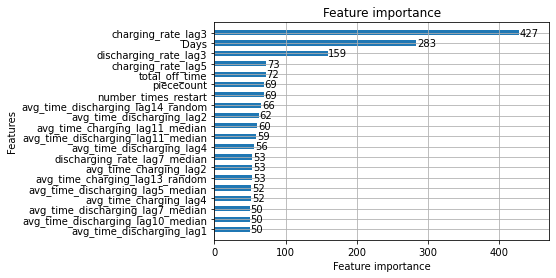

In [29]:
lgb.plot_importance(lgb_model, height=0.5, max_num_features=20)

### LighGBM & SHAP

In [14]:
import shap

# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(test_x) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [15]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explaination with default colors in a force plot
#shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

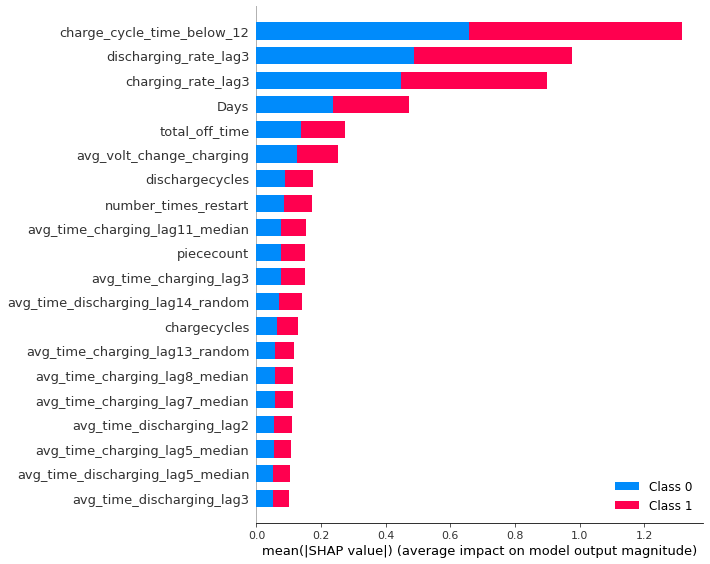

In [16]:
shap.summary_plot(shap_values, test_x, plot_type = "bar")

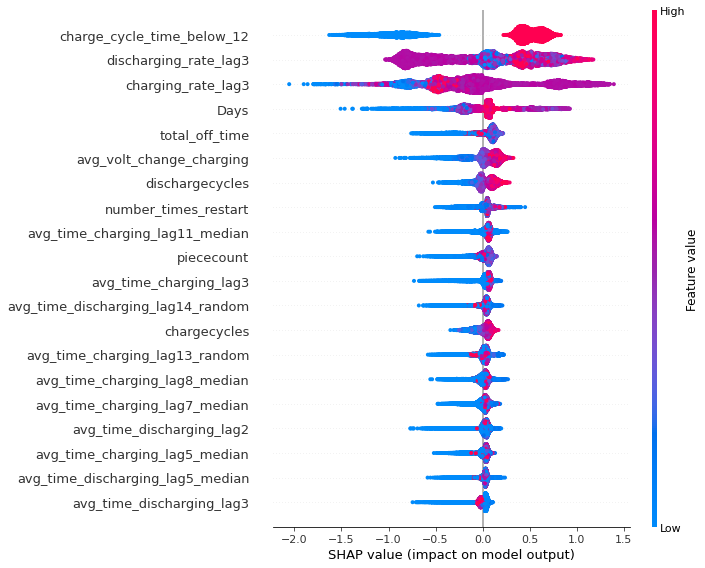

In [17]:
shap.summary_plot(shap_values[1], test_x, plot_type = "dot")

### Extra) Use Gradient Boosting Classifier & Feature Importance function

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=2, subsample=0.8).fit(train_x, train_y)

In [19]:
print("train score: ", gb_model.score(train_x, train_y))
print("test score: ", gb_model.score(test_x, test_y))

train score:  0.7501507295309296
test score:  0.7315112540192926


In [20]:
gb_model.feature_importances_

array([2.63920351e-02, 1.76243534e-04, 1.05334473e-02, 8.08314762e-03,
       4.81836775e-03, 1.46205808e-03, 5.86110251e-03, 0.00000000e+00,
       4.04444026e-03, 9.16617996e-03, 4.92154969e-03, 5.27756886e-03,
       2.83576670e-03, 4.65127605e-03, 3.73813378e-03, 4.97109068e-03,
       0.00000000e+00, 2.95354110e-04, 4.46455924e-03, 6.56534290e-03,
       5.54821038e-03, 3.07774588e-03, 1.36293939e-02, 6.22326432e-03,
       7.93631312e-03, 6.57539332e-03, 5.62286063e-03, 6.62960571e-03,
       3.35723277e-03, 8.85810160e-03, 7.08991521e-03, 5.30341388e-02,
       5.71708594e-03, 4.04309647e-01, 7.09420671e-03, 7.54462564e-02,
       2.75178663e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.74880913e-03, 1.93171779e-01, 2.87612564e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.93755592e-04,
       2.17526243e-02, 1.22780870e-02, 4.17851180e-02])

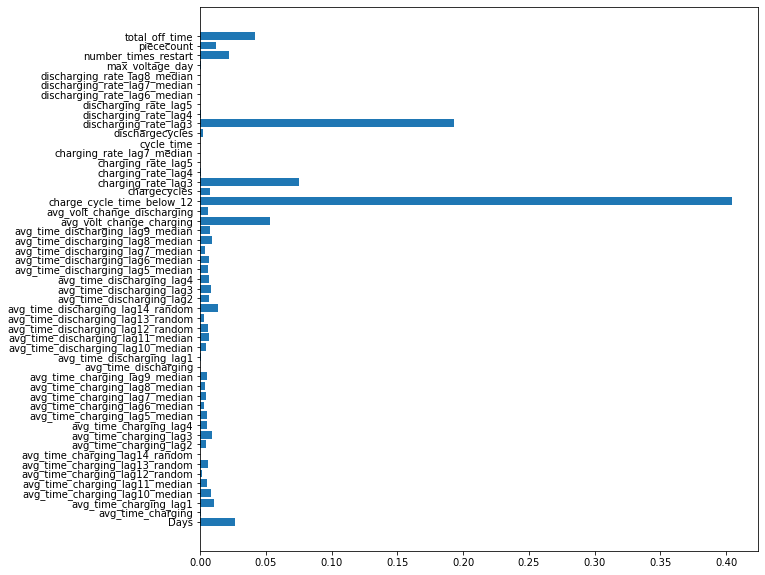

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
def plot_feature_importance(model):
    n_feature= x.shape[1]    
    plt.barh(range(n_feature), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_feature), x.columns)
    plt.show()

plot_feature_importance(gb_model)

### Extra) Use Decision Tree Classifier & SHAP

In [22]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

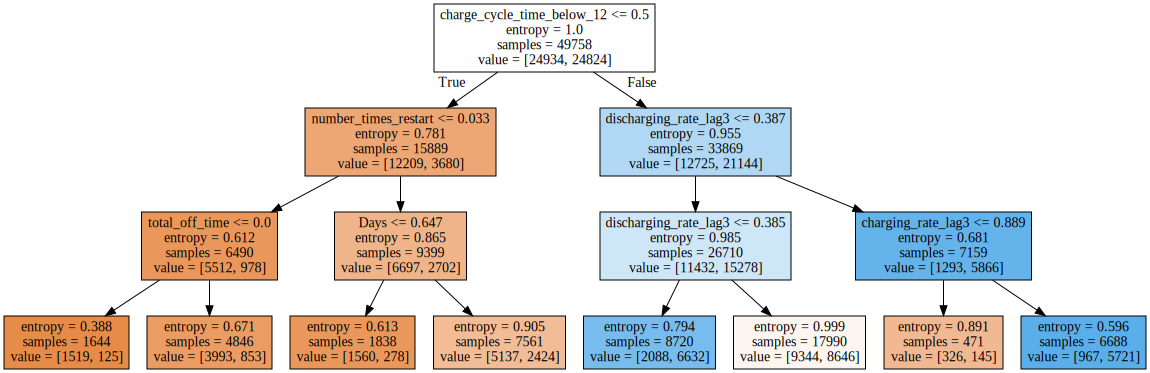

In [24]:
# develop a decision tree model
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
  
# train the model
model.fit(train_x, train_y)
# Visualize how model classified the entire data
tree_graph = export_graphviz(model, out_file=None, feature_names = x.columns, filled=True)
graphviz.Source(tree_graph) 

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


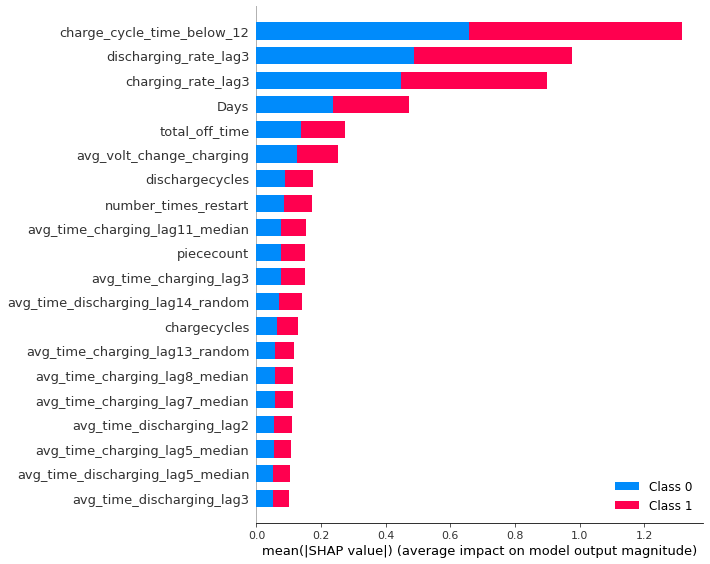

In [25]:
explainer1 = shap.TreeExplainer(model)
shap_values1 = explainer.shap_values(test_x)

shap.summary_plot(shap_values1, test_x, plot_type='bar')